# Mall Customer Patterns using Hierarchical Clustering

**Scenario**: We receive a dataset of mall customers which lists their customer ID, gender, age, annual income, and spending score (1-100).

**Goal**: Explore the dataset.

**Results**: 

Hierarchical clustering was used to distinguish various groups of customers who spend at this mall. We found that five was the optimal number of clusters. At a glance, three clusters was close but the results show that this is not optimal because there is a distinct average customer base that is absorbed by cluster 1 (red). Therefore, with five clusters, we have the same five customer categories as was identified in the K-means clustering model:
1. Low income, low spenders
2. Low income, high spenders
3. Average customers (average income, average spender)
4. High income, low spenders
5. High income, high spenders

## Importing the libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

## Importing the dataset

In [7]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the dendrogram to find the optimal number of clusters

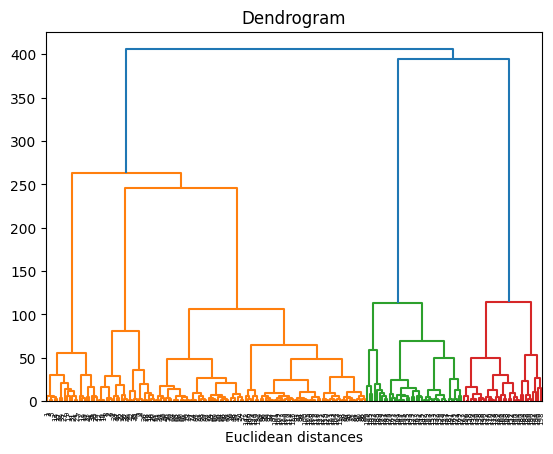

In [8]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method="ward")) # ward method = minimizes variance
plt.title("Dendrogram")
plt.xlabel("Euclidean distances")
plt.show()

The largest distances at a glance produce clusters of either 3 or 5.

## Training the Hierarchical Clustering model on the dataset

### Using 5 Clusters

In [23]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
y_hc = hc.fit_predict(X)

In [24]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Visualising the clusters

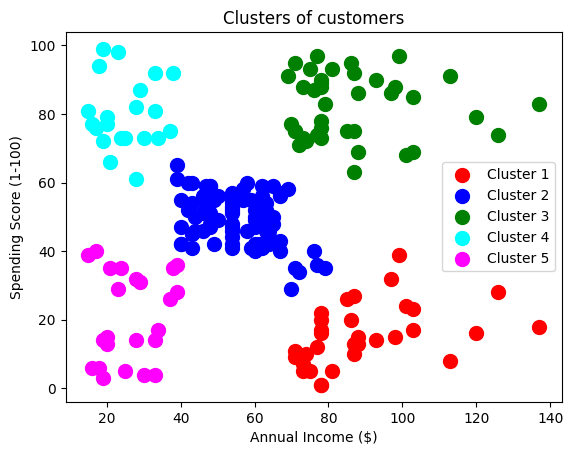

In [25]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = "red", label = "Cluster 1")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = "blue", label = "Cluster 2")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = "green", label = "Cluster 3")
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = "cyan", label = "Cluster 4")
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = "magenta", label = "Cluster 5")
plt.title("Clusters of customers")
plt.xlabel("Annual Income ($)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

### Using 3 Clusters

In [26]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
y_hc = hc.fit_predict(X)

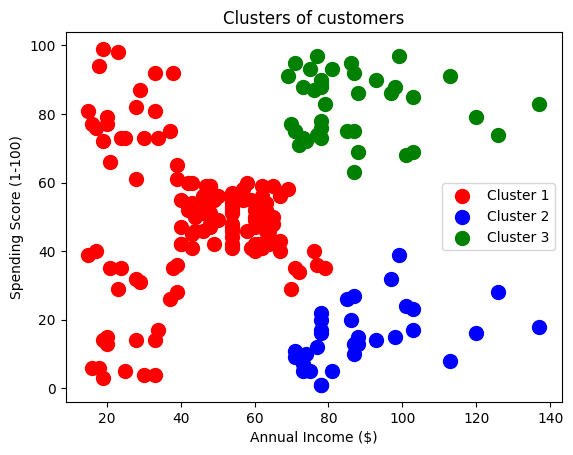

In [27]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = "red", label = "Cluster 1")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = "blue", label = "Cluster 2")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = "green", label = "Cluster 3")
plt.title("Clusters of customers")
plt.xlabel("Annual Income ($)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()